In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

**Importing the dataset**

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
data["Gender"]= data["Gender"].map({'Male':1,'Female': 2})

In [10]:
data = data.drop(columns=["User ID"], axis= 1)
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
X = data.drop(columns = "Purchased", axis = 1)
y = data['Purchased'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

**Feature Scaling**

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [15]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 6, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt')

**Predicting the Test set results**

In [16]:
pred = rf.predict(X_test)
pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
accuracy = accuracy_score(y_test, pred)
accuracy

0.9166666666666666

In [20]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score
f1_score= f1_score(y_test, pred)
f1_score

0.8780487804878049

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


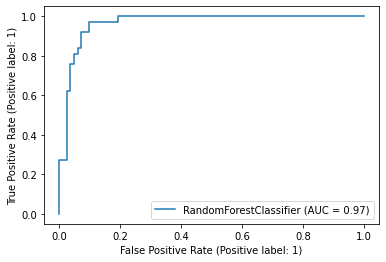

In [21]:
plot_roc_curve(rf, X_test, y_test)

**Making the Confusion Matrix**

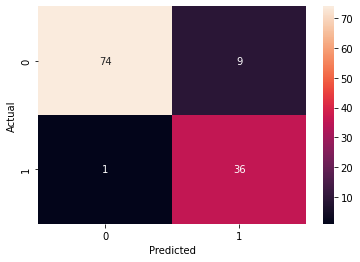

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
cm= pd.crosstab(y_test, pred, rownames= ["Actual"], colnames= ["Predicted"])
sns.heatmap(cm, annot= True)
plt.show()

**Visualising the Training set results**

In [23]:
train_accuracy = accuracy_score(y_train,rf.predict(X_train))
train_accuracy

0.9571428571428572

**Visualising the Test set results**

In [24]:
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.9166666666666666